<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/BABA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (BABA Inc.) using the past 60 day stock price. 

In [ ]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 2)


In [ ]:
#Get the stock quote
data = yf.download('BABA', start=start_date, end=end_date)
#df = web.DataReader('BABA', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,216.600006,219.979996,216.539993,219.770004,219.770004,15873500
2020-01-03,216.350006,218.203003,216.009995,217.000000,217.000000,8604500
2020-01-06,214.889999,217.160004,214.089996,216.639999,216.639999,11885500
2020-01-07,217.639999,218.940002,216.690002,217.630005,217.630005,9388000
2020-01-08,216.600006,220.649994,216.320007,218.000000,218.000000,11959100
...,...,...,...,...,...,...
2021-07-15,215.110001,216.600006,213.160995,214.759995,214.759995,14283600
2021-07-16,214.850006,215.199997,211.460007,212.100006,212.100006,11140100
2021-07-19,206.100006,209.080002,203.240005,208.910004,208.910004,15865800


In [ ]:
#Get the number of rows and columns in the data set
data.shape



(398, 6)

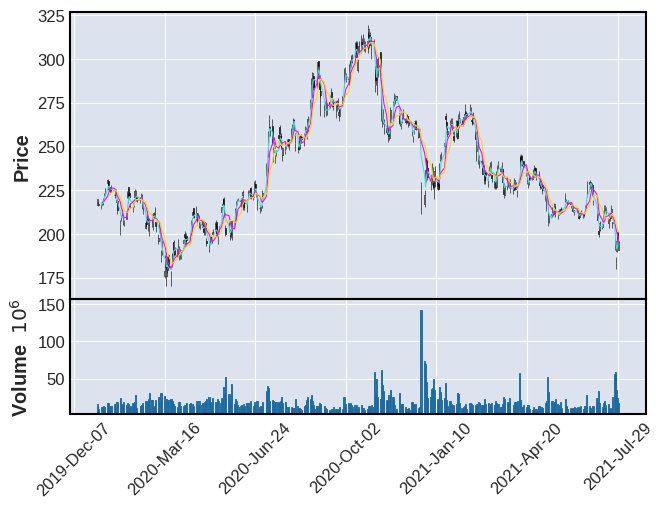

In [ ]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

319

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.30845172],
       [0.2887784 ],
       [0.28622158],
       [0.29325286],
       [0.29588067],
       [0.32272725],
       [0.33728693],
       [0.38451699],
       [0.356179  ],
       [0.34602269],
       [0.33806818],
       [0.36285504],
       [0.32613631],
       [0.32691756],
       [0.30390627],
       [0.26569601],
       [0.20688921],
       [0.24069599],
       [0.25340911],
       [0.22897728],
       [0.21484372],
       [0.26107958],
       [0.33053979],
       [0.31164772],
       [0.31647721],
       [0.28544032],
       [0.28004263],
       [0.29026992],
       [0.34069599],
       [0.31264204],
       [0.30745741],
       [0.31377842],
       [0.32528407],
       [0.29616471],
       [0.25745735],
       [0.2117898 ],
       [0.20788353],
       [0.23011367],
       [0.2037642 ],
       [0.22485795],
       [0.24602269],
       [0.22066764],
       [0.252983  ],
       [0.24943186],
       [0.20099431],
       [0.15142049],
       [0.21342329],
       [0.160

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.30845172, 0.2887784 , 0.28622158, 0.29325286, 0.29588067,
       0.32272725, 0.33728693, 0.38451699, 0.356179  , 0.34602269,
       0.33806818, 0.36285504, 0.32613631, 0.32691756, 0.30390627,
       0.26569601, 0.20688921, 0.24069599, 0.25340911, 0.22897728,
       0.21484372, 0.26107958, 0.33053979, 0.31164772, 0.31647721,
       0.28544032, 0.28004263, 0.29026992, 0.34069599, 0.31264204,
       0.30745741, 0.31377842, 0.32528407, 0.29616471, 0.25745735,
       0.2117898 , 0.20788353, 0.23011367, 0.2037642 , 0.22485795,
       0.24602269, 0.22066764, 0.252983  , 0.24943186, 0.20099431,
       0.15142049, 0.21342329, 0.16029833, 0.06221597, 0.12542615,
       0.01782677, 0.06015625, 0.02599434, 0.03224437, 0.03522732,
       0.        , 0.0668324 , 0.08678977, 0.1348012 , 0.08700283])]
[0.10603697438192694]



In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(259, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

259/259 [==============================] - 12s 31ms/step - loss: 0.0180


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

2.6625261910354037

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


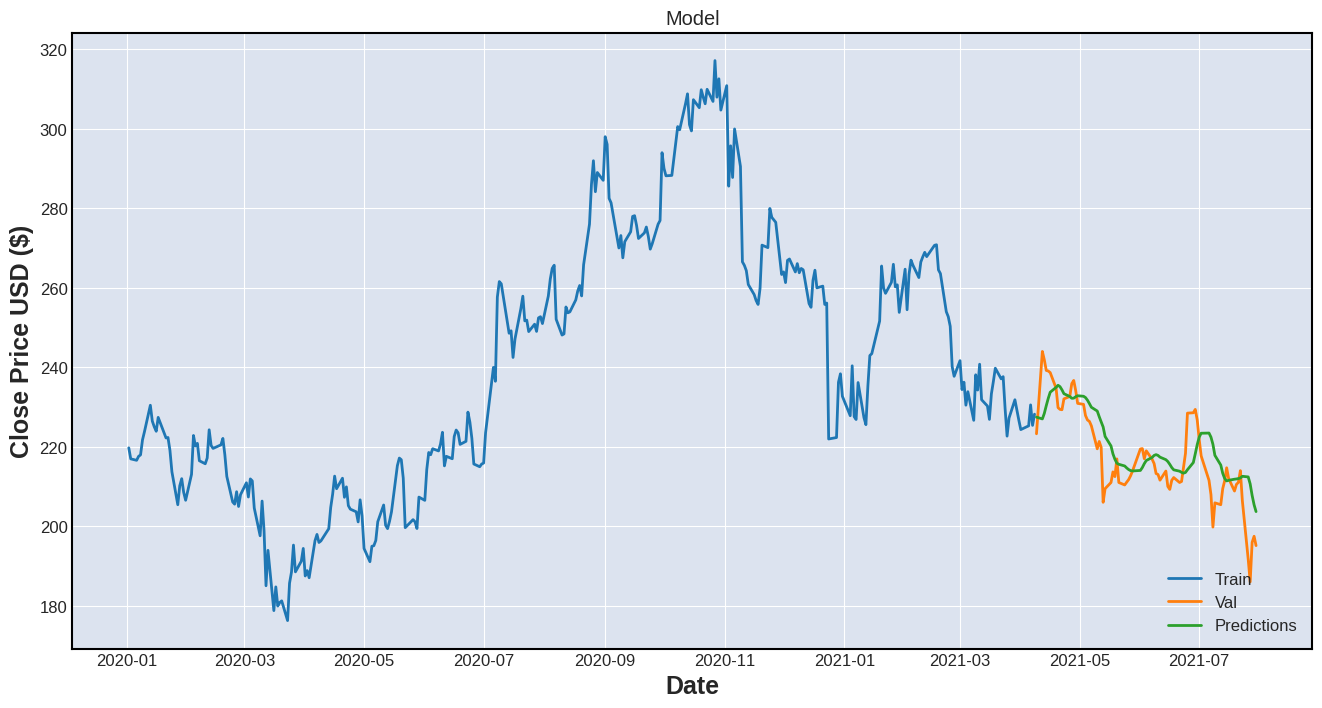

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-09,223.309998,227.495087
2021-04-12,244.009995,227.040649
2021-04-13,241.889999,228.439941
2021-04-14,239.229996,230.389023
2021-04-15,239.089996,232.200516
...,...,...
2021-07-26,191.759995,212.460922
2021-07-27,186.070007,210.702927
2021-07-28,196.009995,207.800781


In [ ]:
#get the quote
apple_quote = yf.download('BABA', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[202.32927]]
